<a href="https://colab.research.google.com/github/raghavendrakulkarni14/Practice_codes/blob/main/SNF_TO_PY_PRACTICE_INFOFISCUS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install snowflake-connector-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.6/194.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.5
    Uninstalling urllib3-2.0.5:
      Successfully uninstalled urllib3-2.0.5


In [74]:
import snowflake.connector
import snowflake
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***CREATING SNOWFLAKE CONNECTION***

In [4]:
conn = snowflake.connector.connect(
    user='raghukul14',
    password='Raghukul@14',
    account='fxhxolc-dz99147',
    warehouse='COMPUTE_WH',
    database='RAGHU',
    schema='PUBLIC'
)

In [40]:
query = """
SELECT column_name
FROM information_schema.columns
WHERE table_name = 'CUSTOMER'
AND table_schema = 'PUBLIC';
"""

cursor = conn.cursor()
cursor.execute(query)

# ***BUILDING DATAFRAME FROM QUERY METHOD-1 STEP-1***

In [48]:
query = """
SELECT column_name
FROM information_schema.columns
WHERE table_name = 'CUSTOMER'
AND table_schema = 'PUBLIC';
"""

cursor = conn.cursor()
cursor.execute(query)

column_names=[]
for row in cursor.fetchall():
  column_names.append(row[0])

# ***BUILDING DATAFRAME FROM QUERY METHOD-1 STEP-2***

In [49]:
cursor = conn.cursor()

query = f"SELECT * from CUSTOMER"
df = pd.DataFrame(result,columns=column_names)
df.head()

,CONTACT,CREDIT_SCORE,EMAIL,LAST_NAME,SSN,ADDRESS,STATUS,FIRST_NAME
0,8759,joe,Koufos,8713097868 : joe.Koufos@gmail.com,485,Online,United States Of America,joe.Koufos@gmail.com
1,8760,steve,preston,8713097869 : steve.preston@gmail.com,486,Online,America,steve.preston@gmail.com
2,8761,glen,Qi,None,487,offline,America,None
3,8762,greg,Randolph,greg.Randolph@gmail.com,488,offline,America,greg.Randolph@gmail.com
4,8763,larry,Stephens,9113097872 : larry.Stephens@gmail.com,489,offline,America,larry.Stephens@gmail.com


# ***BUILDING DATAFRAME FROM QUERY METHOD-2***

In [51]:
df = pd.read_sql(query, conn)
df.head()

<ipython-input-51-57de2371cb8a>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,SSN,FIRST_NAME,LAST_NAME,CONTACT,CREDIT_SCORE,STATUS,ADDRESS,EMAIL
0,8759,joe,Koufos,8713097868 : joe.Koufos@gmail.com,485,Online,United States Of America,joe.Koufos@gmail.com
1,8760,steve,preston,8713097869 : steve.preston@gmail.com,486,Online,America,steve.preston@gmail.com
2,8761,glen,Qi,None,487,offline,America,None
3,8762,greg,Randolph,greg.Randolph@gmail.com,488,offline,America,greg.Randolph@gmail.com
4,8763,larry,Stephens,9113097872 : larry.Stephens@gmail.com,489,offline,America,larry.Stephens@gmail.com


In [52]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SSN           19 non-null     int64 
 1   FIRST_NAME    19 non-null     object
 2   LAST_NAME     19 non-null     object
 3   CONTACT       18 non-null     object
 4   CREDIT_SCORE  19 non-null     int64 
 5   STATUS        19 non-null     object
 6   ADDRESS       19 non-null     object
 7   EMAIL         18 non-null     object
dtypes: int64(2), object(6)
memory usage: 1.3+ KB


In [53]:
df.describe()

,SSN,CREDIT_SCORE
count,19.000000,19.000000
mean,8791.368421,505.894737
std,73.831046,148.261741
min,8759.000000,235.000000
25%,8763.500000,485.500000
50%,8768.000000,490.000000
75%,8772.000000,609.000000
max,9001.000000,789.000000


In [102]:
df.isnull().sum()

SSN             0
FIRST_NAME      0
LAST_NAME       0
CONTACT         1
CREDIT_SCORE    0
STATUS          0
ADDRESS         0
EMAIL           1
dtype: int64

In [54]:
df.shape

(19, 8)

# **COLOR PALETTE values:deep, muted, pastel, dark, colorblind**

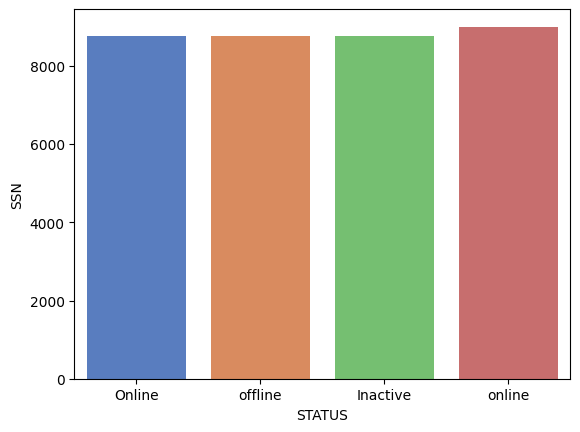

In [101]:
sns.barplot( x='STATUS',y='SSN',data=df,palette='muted')
plt.show()

In [105]:
# Plot to see people who smoke more based on gender
"""sns.barplot(x="sex",
           y="smoking",
           hue="is_smoking",
           data=df_smoke,palette='GnBu_r')
plt.title('Plot of people who smoke based on gender')"""

'sns.barplot(x="sex",\n           y="smoking",\n           hue="is_smoking",\n           data=df_smoke,palette=\'GnBu_r\')\nplt.title(\'Plot of people who smoke based on gender\')'